**ESTUDIO DISPOSITIVOS**

- Hay alguna tendencia, en que si hay paso que falla, se va a otro dispositivo, y termina el proceso?.

In [1]:
import pandas as pd

In [26]:
df_web_data = pd.read_csv('../02_DATA_LIMPIO/df_web_data_combinado_limpio.csv')
df_experiment_clients = pd.read_csv('../CSV/df_final_experiment_clients.csv')
df_demo = pd.read_csv('../CSV/df_final_demo.csv')

**1. Identificar usuarios que inician con un dispositivo (visitor_id) y cambian a otro dispositivo, luego completan el proceso (process_step = 'confirm').**

In [27]:
# Selecciono las columnas necesarias para el análisis
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])
df_web_data_ordenada = df_web_data.sort_values(by=['client_id', 'date_time'])

In [28]:
df_web_data_ordenada

,client_id,visitor_id,visit_id,process_step,date_time
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58


In [29]:
# Agrupo por cliente y observamos si tienen múltiples visitor_id
visitor_cambiado = df_web_data_ordenada.groupby('client_id')['visitor_id'].nunique()
clients_cambio = visitor_cambiado[visitor_cambiado > 1].index

In [30]:
print(visitor_cambiado)
print(clients_cambio)

client_id
169        1
336        1
546        1
555        1
647        1
          ..
9999729    3
9999768    1
9999832    1
9999839    1
9999875    1
Name: visitor_id, Length: 120157, dtype: int64
Index([   1643,    1680,    4653,    6130,    7367,    9282,   11070,   11309,
         11443,   13413,
       ...
       9992821, 9994407, 9994607, 9995309, 9996088, 9996404, 9996952, 9997470,
       9998342, 9999729],
      dtype='int64', name='client_id', length=9773)


In [31]:
# Filtramos datos para estos clientes
df_clients_cambio = df_web_data_ordenada[df_web_data_ordenada['client_id'].isin(clients_cambio)]

In [32]:
df_clients_cambio

,client_id,visitor_id,visit_id,process_step,date_time
240890,1643,910842861_51062379179,379946188_1773022140_107963,start,2017-04-15 15:06:00
240922,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:36:07
240921,1643,910842861_51062379179,633860590_96880450633_976109,step_1,2017-04-24 06:36:32
240920,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:37:17
240919,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:38:20
...,...,...,...,...,...
471740,9999729,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25
471739,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30
471738,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40
471737,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19


In [33]:
# Paso 2: Identificamos en qué paso cambia de dispositivo
# Creamos una copia del DataFrame filtrado para evitar el SettingWithCopyWarning
df_clients_cambios = df_clients_cambio.copy()

# Identificamos el cambio de dispositivo
df_clients_cambios['device_change'] = df_clients_cambios.groupby('client_id')['visitor_id'].shift() != df_clients_cambios['visitor_id']

# Filtrar solo los pasos donde ocurre el cambio de dispositivo
device_change_steps = df_clients_cambios[df_clients_cambios['device_change']]

In [34]:
device_change_steps

,client_id,visitor_id,visit_id,process_step,date_time,device_change
240890,1643,910842861_51062379179,379946188_1773022140_107963,start,2017-04-15 15:06:00,True
632385,1643,121807985_20524560478,753205700_16851596206_134483,start,2017-06-10 07:49:27,True
226365,1680,262688118_24224945474,807102410_81976926205_767113,start,2017-03-15 09:57:21,True
614440,1680,95496252_89175705853,561970892_34952005684_284982,start,2017-06-09 07:42:33,True
551815,4653,478563126_49472157149,97289181_43780844122_933636,start,2017-06-13 13:25:27,True
...,...,...,...,...,...,...
460597,9998342,439673115_54044543822,928161321_59863738074_101020,start,2017-06-15 05:58:44,True
460613,9998342,837500884_34409443228,576728093_86949947450_305057,start,2017-06-17 10:24:02,True
107095,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,True
107166,9999729,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:21:27,True


In [41]:
device_change_steps.to_csv('../02_DATA_LIMPIO/device_change_steps.csv', index=False)

In [35]:
# Paso 3: Determinamos si completan el proceso después del cambio de dispositivo
df_confirm = df_clients_cambios[df_clients_cambios['process_step'] == 'confirm']
clients_confirm_cambiado = df_confirm[df_confirm['client_id'].isin(device_change_steps['client_id'])]['client_id'].unique()

In [36]:
clients_confirm_cambiado

array([   1643,    1680,    7367, ..., 9996952, 9997470, 9999729])

In [37]:
# Cálculamos de porcentajes
total_clients = len(clients_cambio)
clients_completed = len(clients_confirm_cambiado)
percentage_completed_cambiado = (clients_completed / total_clients) * 100 if total_clients > 0 else 0

In [38]:
# Paso en el que ocurre el cambio
step_change_counts = device_change_steps['process_step'].value_counts()

In [45]:
step_change_counts

process_step
start      19266
confirm     2932
step_1       207
step_3        84
step_2        23
Name: count, dtype: int64

In [46]:
# Convertir a DataFrame con dos columnas
step_change_counts_df = step_change_counts.reset_index()
step_change_counts_df.columns = ['process_step', 'counts']

In [48]:
step_change_counts_df.to_csv('../02_DATA_LIMPIO/step_change_counts.csv', index=False)

In [39]:
# Resultados
{
    "total_clients_with_switch": total_clients,
    "percentage_completed_after_switch": percentage_completed_cambiado,
    "step_change_counts": step_change_counts.to_dict()
}

{'total_clients_with_switch': 9773,
 'percentage_completed_after_switch': 73.07889082165148,
 'step_change_counts': {'start': 19266,
  'confirm': 2932,
  'step_1': 207,
  'step_3': 84,
  'step_2': 23}}

# **GRÁFICOS**

In [16]:
import matplotlib.pyplot as plt

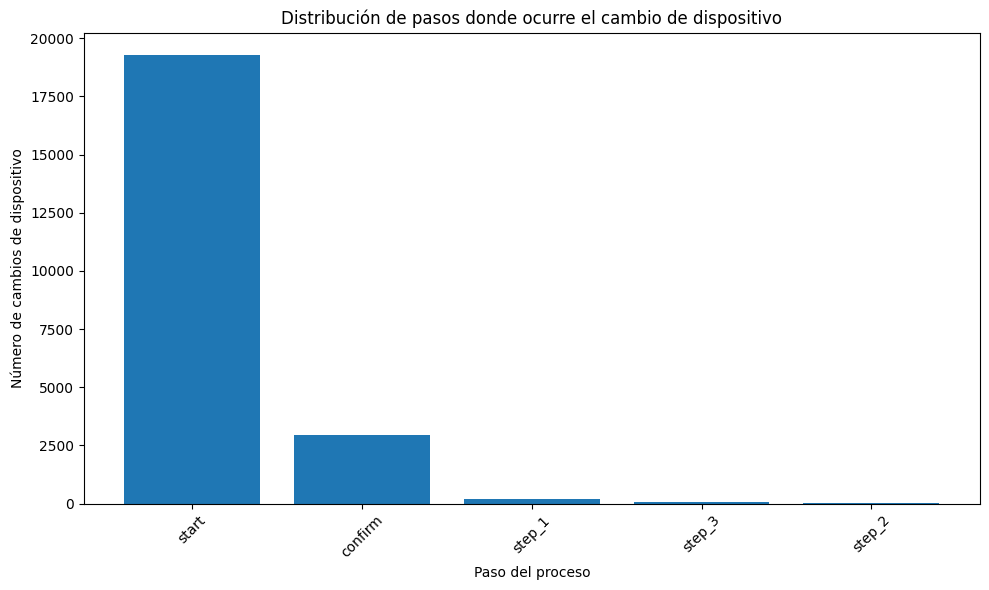

In [17]:
# 1. Distribución de pasos donde ocurre el cambio de dispositivo
step_change_counts = device_change_steps['process_step'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(step_change_counts.index, step_change_counts.values)
plt.xlabel('Paso del proceso')
plt.ylabel('Número de cambios de dispositivo')
plt.title('Distribución de pasos donde ocurre el cambio de dispositivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

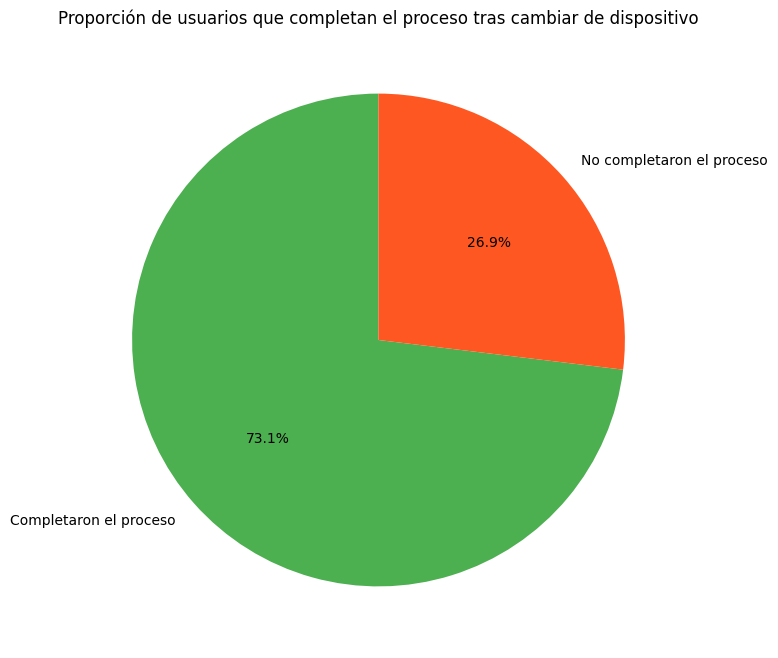

In [18]:
# 2. Proporción de usuarios que completan el proceso tras cambiar de dispositivo
labels = ['Completaron el proceso', 'No completaron el proceso']
values = [clients_completed, total_clients - clients_completed]
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5722'])
plt.title('Proporción de usuarios que completan el proceso tras cambiar de dispositivo')
plt.show()

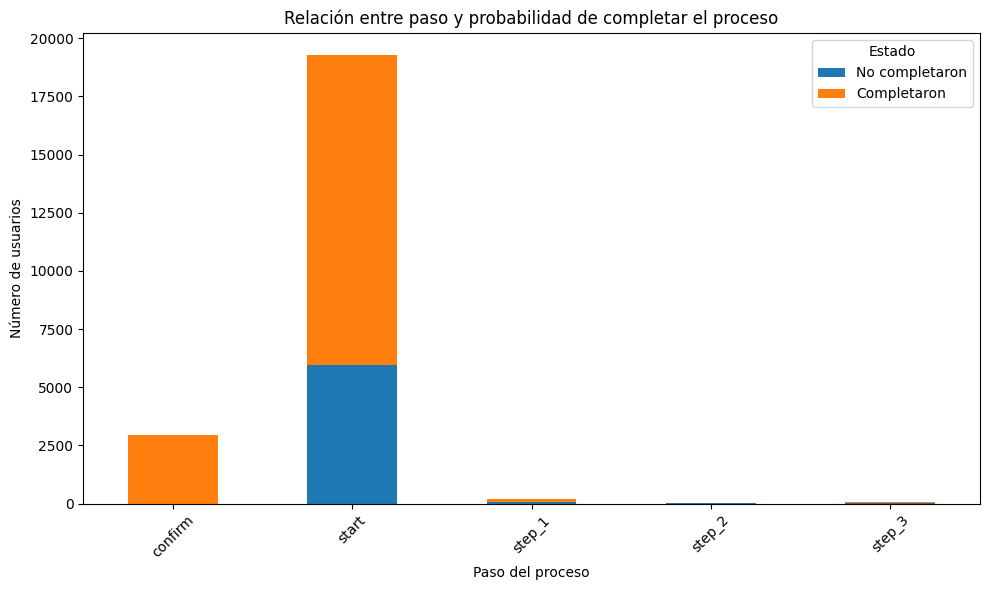

In [19]:
# 3. Relación entre el paso donde ocurre el cambio y la probabilidad de completar el proceso
completion_status = device_change_steps.merge(
    df_confirm[['client_id']].drop_duplicates().assign(completed=1),
    on='client_id',
    how='left'
).fillna({'completed': 0})

completion_by_step = completion_status.groupby('process_step')['completed'].value_counts().unstack().fillna(0)
completion_by_step.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Paso del proceso')
plt.ylabel('Número de usuarios')
plt.title('Relación entre paso y probabilidad de completar el proceso')
plt.legend(['No completaron', 'Completaron'], title='Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
completion_status

,client_id,visitor_id,visit_id,process_step,date_time,device_change,completed
0,1643,910842861_51062379179,379946188_1773022140_107963,start,2017-04-15 15:06:00,True,1.00%
1,1643,121807985_20524560478,753205700_16851596206_134483,start,2017-06-10 07:49:27,True,1.00%
2,1680,262688118_24224945474,807102410_81976926205_767113,start,2017-03-15 09:57:21,True,1.00%
3,1680,95496252_89175705853,561970892_34952005684_284982,start,2017-06-09 07:42:33,True,1.00%
4,4653,478563126_49472157149,97289181_43780844122_933636,start,2017-06-13 13:25:27,True,0.00%
...,...,...,...,...,...,...,...
22507,9998342,439673115_54044543822,928161321_59863738074_101020,start,2017-06-15 05:58:44,True,0.00%
22508,9998342,837500884_34409443228,576728093_86949947450_305057,start,2017-06-17 10:24:02,True,0.00%
22509,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,True,1.00%
22510,9999729,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:21:27,True,1.00%


<Figure size 1000x600 with 0 Axes>

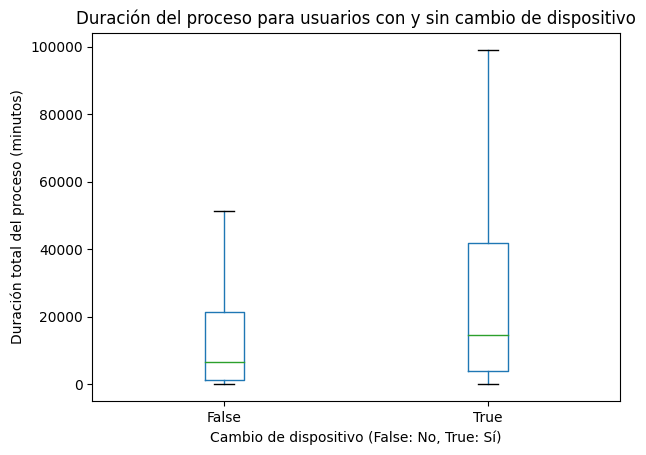

In [20]:
df_web_data_ordenada['process_duration'] = df_web_data_ordenada.groupby('client_id')['date_time'].transform(lambda x: x.max() - x.min())
df_web_data_ordenada['changed_device'] = df_web_data_ordenada['client_id'].isin(clients_cambio)
duration_comparison = df_web_data_ordenada[['changed_device', 'process_duration']].drop_duplicates()
duration_comparison['process_duration'] = duration_comparison['process_duration'].dt.total_seconds() / 60  # Convert to minutes

plt.figure(figsize=(10, 6))
duration_comparison.boxplot(by='changed_device', column=['process_duration'], grid=False, showfliers=False)
plt.xlabel('Cambio de dispositivo (False: No, True: Sí)')
plt.ylabel('Duración total del proceso (minutos)')
plt.title('Duración del proceso para usuarios con y sin cambio de dispositivo')
plt.suptitle('')
plt.tight_layout()
plt.show()

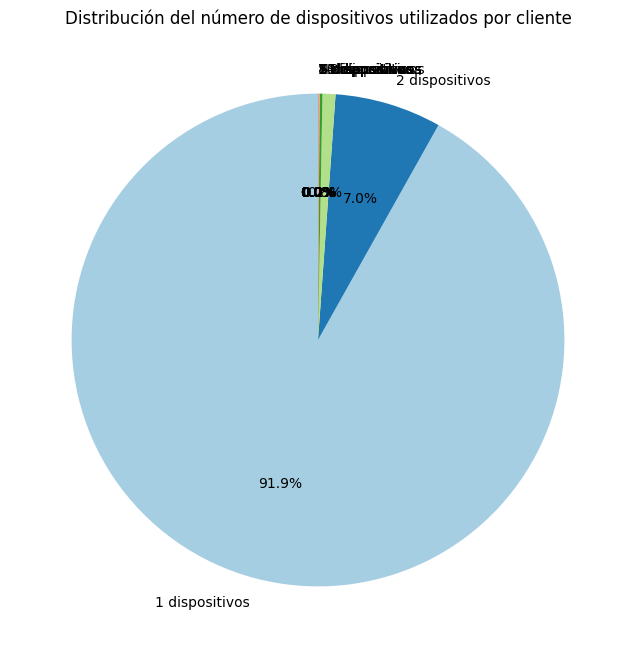

In [21]:
# Calcular la distribución del número de dispositivos utilizados por cliente
device_counts = df_web_data.groupby('client_id')['visitor_id'].nunique()
device_counts_distribution = device_counts.value_counts(normalize=True)

# Crear un gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(
    device_counts_distribution, 
    labels=[f"{int(i)} dispositivos" for i in device_counts_distribution.index],
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
plt.title('Distribución del número de dispositivos utilizados por cliente')
plt.show()

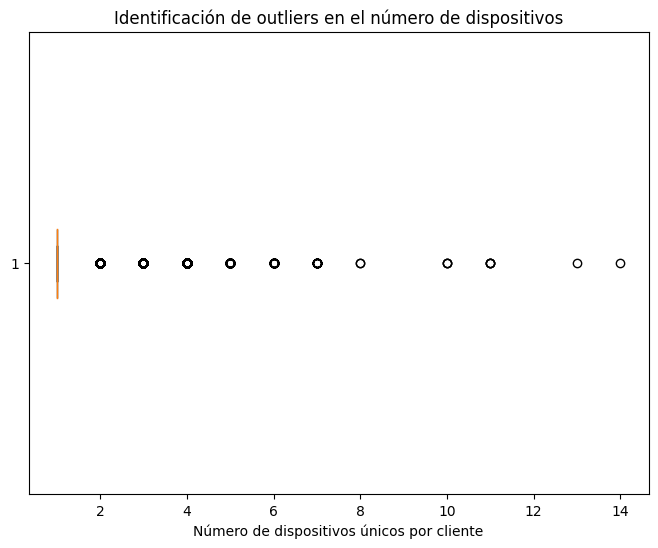

In [22]:
# Crear un boxplot para identificar outliers en el número de dispositivos
plt.figure(figsize=(8, 6))
plt.boxplot(device_counts, vert=False, patch_artist=True, showfliers=True)
plt.xlabel('Número de dispositivos únicos por cliente')
plt.title('Identificación de outliers en el número de dispositivos')
plt.show()


In [23]:
# Calcular el rango intercuartil (IQR)
q1 = device_counts.quantile(0.25)
q3 = device_counts.quantile(0.75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificar clientes outliers
outliers = device_counts[(device_counts < lower_bound) | (device_counts > upper_bound)]

outliers

client_id
1643       2
1680       2
4653       2
6130       3
7367       2
          ..
9996404    2
9996952    2
9997470    2
9998342    2
9999729    3
Name: visitor_id, Length: 9773, dtype: int64

**Calcular el porcentaje de cambios de dispositivo en cada paso del proceso**

In [24]:
# Filtramos usuarios que cambiaron de dispositivo
df_device_changes = df_web_data_ordenada[df_web_data_ordenada['client_id'].isin(clients_cambio)].copy()

# Agregamos la columna 'device_change' para identificar los cambios
df_device_changes['device_change'] = df_device_changes.groupby('client_id')['visitor_id'].shift() != df_device_changes['visitor_id']

# Filtramos solo las filas donde ocurrió un cambio de dispositivo
device_change_steps = df_device_changes[df_device_changes['device_change']]

# Combino con la tabla de experimentos para obtener la columna 'variation'
device_change_steps = device_change_steps.merge(df_experiment_clients, on='client_id', how='left')

# Conteo de cambios por paso y tipo de test
changes_by_step_and_variation = device_change_steps.groupby(['Variation', 'process_step']).size().reset_index(name='count')

# Calculamos el porcentaje de cambios por tipo de test
changes_by_variation_total = changes_by_step_and_variation.groupby('Variation')['count'].transform('sum')
changes_by_step_and_variation['percentage'] = (changes_by_step_and_variation['count'] / changes_by_variation_total) * 100


In [25]:
# Cambiamos la columna de la tabla para los resultados 
pd.set_option('display.float_format', '{:.2f}%'.format)  # Formato porcentual para las columnas de porcentaje
print("Porcentaje de cambios por paso y tipo de test:")
print(changes_by_step_and_variation)


Porcentaje de cambios por paso y tipo de test:
  Variation process_step  count  percentage
0   Control      confirm    208       3.85%
1   Control        start   5121      94.87%
2   Control       step_1     50       0.93%
3   Control       step_2      3       0.06%
4   Control       step_3     16       0.30%
5      Test      confirm   1026      17.68%
6      Test        start   4722      81.36%
7      Test       step_1     34       0.59%
8      Test       step_2      6       0.10%
9      Test       step_3     16       0.28%
